In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data
Users = pd.read_csv('USER_TAKEHOME.csv')
Transactions = pd.read_csv('TRANSACTION_TAKEHOME.csv')
Products = pd.read_csv('PRODUCTS_TAKEHOME.csv')

<!-- First: explore the data
Review the unstructured csv files and answer the following questions with code that supports your conclusions:
Are there any data quality issues present?
Are there any fields that are challenging to understand?
We recommend using SQL or python and data visualization to examine the data. -->

## First: explore the data

### 1. Users table
#### Based on the investigation:
1. ID field is a unique identifier in the Users table
2. The table contains users created from 2014 to 2024, mainly 19-64 years old females living in Texas, Florida, and Calfornia, with majority English speakers
3. Field LANGUAGE has the the most missing values
4. Field BIRTH_DATE has potential data issue - 
        a. found records with 100+ or 10- ages, potentially data errors
        b. found over 1k records with the same birthdate (1970-01-01), potentially a default value

In [3]:
# Examine data
Users.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [4]:
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


In [5]:
# Check unique ID
Users['ID'].is_unique

True

In [6]:
# Check users creation date
Users['CREATED_DATE'].min(),Users['CREATED_DATE'].max(),

('2014-04-18 23:14:55.000 Z', '2024-09-11 17:59:15.000 Z')

In [7]:
# Check age of the users and found users with over 100 years old - potentially data errors
Users['BIRTH_DATE2'] = pd.to_datetime(Users['BIRTH_DATE'], errors='coerce')
current_year = datetime.datetime.now().year
Users['AGE'] = current_year - Users['BIRTH_DATE2'].dt.year

Users['AGE'].min(), Users['AGE'].max()

(3.0, 125.0)

In [8]:
# Check birth_date and found high frequency of 1970-01-01 - default value
Users['BIRTH_DATE'].value_counts().head(10)

1970-01-01 00:00:00.000 Z    1272
1979-12-11 08:00:00.000 Z      63
2000-12-12 00:00:00.000 Z      28
2000-12-31 00:00:00.000 Z      23
2001-01-01 00:00:00.000 Z      16
1988-10-28 04:00:00.000 Z      15
1999-12-31 00:00:00.000 Z      15
1999-12-12 00:00:00.000 Z      14
2000-12-11 00:00:00.000 Z      14
1990-01-01 00:00:00.000 Z      14
Name: BIRTH_DATE, dtype: int64

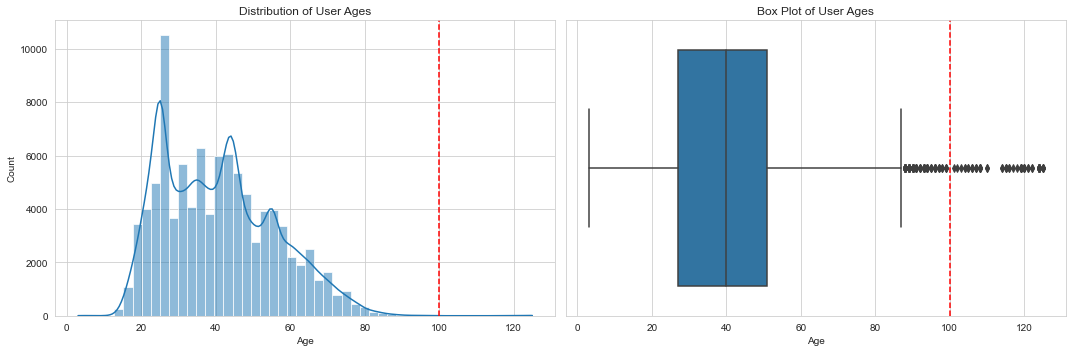

In [9]:
# Create plot to show age distribution and outliers
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram to show age distribution
sns.histplot(Users["AGE"], bins=50, kde=True, ax=axes[0])
axes[0].axvline(100, color='red', linestyle='dashed', linewidth=1.5)  # Mark 100-year threshold
axes[0].set_title("Distribution of User Ages")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

# Box plot to highlight outliers
sns.boxplot(x=Users["AGE"], ax=axes[1])
axes[1].axvline(100, color='red', linestyle='dashed', linewidth=1.5)  # Mark 100-year threshold
axes[1].set_title("Box Plot of User Ages")
axes[1].set_xlabel("Age")

# Show plots
plt.tight_layout()
plt.show()

In [10]:
# Created age bands and get distribution
bins = [0, 18, 25, 35, 45, 55, 65, 75, 100, 150]  
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-100', '100+']
Users['Age Band'] = pd.cut(Users['AGE'], bins=bins, labels=labels, right=False)
Users['Age Band'].value_counts()

25-34     23993
35-44     22135
45-54     16558
18-24     12360
55-64     12291
65-74      5826
75-100     1726
<18        1374
100+         62
Name: Age Band, dtype: int64

In [11]:
# Check distribution of gender
Users['GENDER'].value_counts(normalize=True)

female                    0.682620
male                      0.274461
transgender               0.018829
prefer_not_to_say         0.014345
non_binary                0.005026
unknown                   0.002083
not_listed                0.001913
Non-Binary                0.000361
not_specified             0.000298
My gender isn't listed    0.000053
Prefer not to say         0.000011
Name: GENDER, dtype: float64

In [12]:
# Check distribution of state
Users['STATE'].value_counts(normalize=True).head(5)

TX    0.094844
FL    0.093720
CA    0.090232
NY    0.059913
IL    0.039858
Name: STATE, dtype: float64

In [13]:
# Check distribution of language
Users['LANGUAGE'].value_counts(normalize=True,dropna=False)

en        0.63403
NaN       0.30508
es-419    0.06089
Name: LANGUAGE, dtype: float64

### 2. Products table
#### Based on the investigation:
1. There's no unique identifier in this table
2. There are some duplicates records, indicating potential data issue in the data
3. There are some missing values in the dataset. Missings are found in all of the columns. CATEGORY_4 contains over 92% missing value. For barcode, missing mainly happen in restaurent Beverages, À La Carte Item	and Alchohol Wine and Beer categories. 
4.  Potential data issue on Barcode: 
        a. identified some records with same barcode but different manufacturer/brand
        b. some of those with duplicated barcodes have PLACEHOLDER MANUFACTURER or BRAND NOT KNOWN -> Potentailly can be used for dedup logic



In [14]:
# Examine Data
Products.head(2)

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10


In [15]:
Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


In [16]:
# Check unique key - barcode is not a unique key
Products['BARCODE'].is_unique

False

In [17]:
# Found CATEGORY_4 has high percentage of missing values
Products[Products['CATEGORY_4'].isna()].shape[0]/Products.shape[0]

0.9202189812099079

In [18]:
# Check duplicated BARCODE - only 370 records
Products[(Products.duplicated(['BARCODE'], keep=False)) & (Products['BARCODE'].notna())].sort_values(by='BARCODE')

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
349945,Snacks,Candy,Confection Candy,NaN,MARS WRIGLEY,STARBURST,4.005100e+05
99568,Snacks,Candy,Confection Candy,NaN,MARS WRIGLEY,STARBURST,4.005100e+05
139121,Snacks,Candy,Chocolate Candy,NaN,PLACEHOLDER MANUFACTURER,BRAND NOT KNOWN,4.043100e+05
841230,Snacks,Candy,Chocolate Candy,NaN,MARS WRIGLEY,M&M'S,4.043100e+05
274321,Snacks,Crackers,Graham Crackers,NaN,TRADER JOE'S,TRADER JOE'S,4.387110e+05
...,...,...,...,...,...,...,...
708466,Snacks,Candy,Mints,NaN,LOTUS BRANDS INC,ECO-DENT,3.600540e+08
304021,Health & Wellness,Hair Care,Hair Color,NaN,HENKEL,GÖT2B,1.700033e+10
213340,Health & Wellness,Hair Care,Hair Color,NaN,HENKEL,SCHWARZKOPF,1.700033e+10
28421,Health & Wellness,Hair Care,Hair Color,NaN,HENKEL,SCHWARZKOPF,5.233692e+10


In [19]:
# # Examine products with missing barcode
# pd.merge(Products[Products['BARCODE'].isna()].groupby(['CATEGORY_1','CATEGORY_2','CATEGORY_3','CATEGORY_4'])[['BARCODE']].size().reset_index(name='Missing'),
#          Products.groupby(['CATEGORY_1','CATEGORY_2','CATEGORY_3','CATEGORY_4'])[['BARCODE']].size().reset_index(name='Total_counts'), 
#          how='left', on=['CATEGORY_1','CATEGORY_2','CATEGORY_3','CATEGORY_4']).assign(
#         missing_rate=lambda x: x['Missing'] / x['Total_counts']).sort_values(by='missing_rate',ascending=False)

In [20]:
# Examine products with missing barcode and get top 5
pd.merge(Products[Products['BARCODE'].isna()].groupby(['CATEGORY_1','CATEGORY_2'])[['BARCODE']].size().reset_index(name='Missing'),
         Products.groupby(['CATEGORY_1','CATEGORY_2'])[['BARCODE']].size().reset_index(name='Total_counts'), 
         how='left', on=['CATEGORY_1','CATEGORY_2']).assign(
        missing_rate=lambda x: x['Missing'] / x['Total_counts']).sort_values(by='missing_rate',ascending=False).head(5)

,CATEGORY_1,CATEGORY_2,Missing,Total_counts,missing_rate
24,Restaurant,Beverages,33,64,0.515625
25,Restaurant,À La Carte Item,1,5,0.200000
1,Alcohol,Wine,22,341,0.064516
0,Alcohol,Beer,4,134,0.029851
6,Deli & Bakery,Prepared Meals,2,68,0.029412


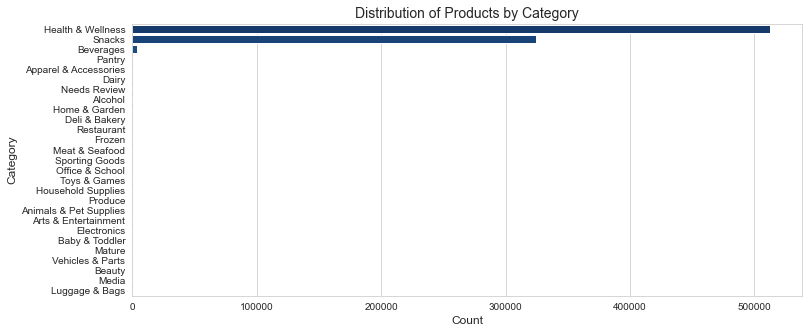

In [21]:
# Distribution of Categories
plt.figure(figsize=(12, 5))
sns.countplot(y=Products["CATEGORY_1"], order=Products["CATEGORY_1"].value_counts().index, palette="Blues_r")
plt.title("Distribution of Products by Category", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.show()

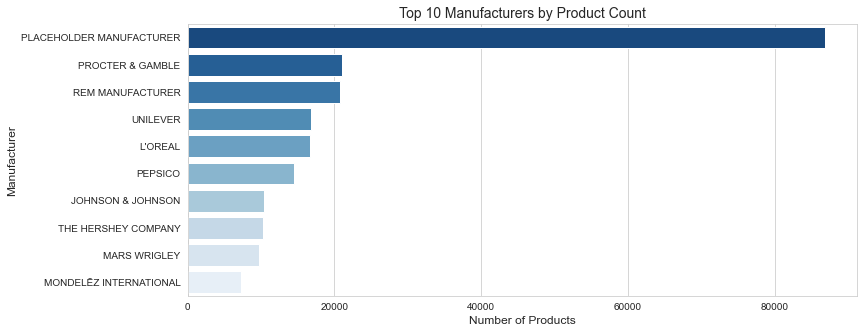

In [22]:
# Top 10 Manufacturers
top_manufacturers = Products["MANUFACTURER"].value_counts().head(10)
plt.figure(figsize=(12, 5))
sns.barplot(x=top_manufacturers.values, y=top_manufacturers.index, palette="Blues_r")
plt.title("Top 10 Manufacturers by Product Count", fontsize=14)
plt.xlabel("Number of Products", fontsize=12)
plt.ylabel("Manufacturer", fontsize=12)
plt.show()

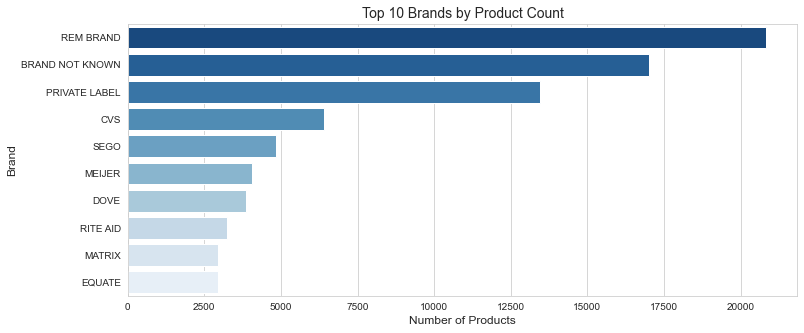

In [23]:
# Top 10 Brands
top_brands = Products["BRAND"].value_counts().head(10)
plt.figure(figsize=(12, 5))
sns.barplot(x=top_brands.values, y=top_brands.index, palette="Blues_r")
plt.title("Top 10 Brands by Product Count", fontsize=14)
plt.xlabel("Number of Products", fontsize=12)
plt.ylabel("Brand", fontsize=12)
plt.show()

### 3. Transactions Table
#### Based on the investigation:
1. There's no unique id in the transaction data
2. Field RECEIPT_ID contains duplicated records. Each RECEIPT_ID appeared at least twice in the data.
3. Fields all saved as object for FINAL_QUANTITY and FINAL_SALE, indicating potential data issues-
        a. 0 quantity is saved as 'zero' in field FINAL_QUANTITY
        b. spaces ' ' is found in field FINAL_SALE
        c. numbers are all saved as string in the two fields

In [24]:
# Examine data
Transactions.head(3)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,


In [25]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


In [26]:
# Check RECEIPT_ID and found duplicates
Transactions['RECEIPT_ID'].is_unique

False

In [27]:
# Each RECEIPT_ID at least appeared twice in the data
Transactions.groupby(['RECEIPT_ID']).size().value_counts()

2     23920
4       488
6        26
8         5
12        1
dtype: int64

In [28]:
# Check PURCHASE_DATE and SCAN_DATE ranges
Transactions['PURCHASE_DATE'].min(),Transactions['PURCHASE_DATE'].max(),Transactions['SCAN_DATE'].min(),Transactions['SCAN_DATE'].max()

('2024-06-12',
 '2024-09-08',
 '2024-06-12 06:36:34.910 Z',
 '2024-09-08 23:07:19.836 Z')

In [29]:
# Check FINAL_QUANTITY - found 0 is labeled as 'zero'
Transactions['FINAL_QUANTITY'].value_counts().head()

1.00    35698
zero    12500
2.00     1285
3.00      184
4.00      139
Name: FINAL_QUANTITY, dtype: int64

In [30]:
# Check FINAL_SALE and found most of the records with FINAL_SALE missing, needs further data cleaning before analysis
Transactions['FINAL_SALE'].value_counts().head()

        12500
1.25     1323
1.00      744
2.99      588
1.99      586
Name: FINAL_SALE, dtype: int64

In [31]:
# Missing FINAL_SALE is labeled as string ' ', needs further data cleaning before analysis
Transactions['FINAL_SALE'].unique()

array([' ', '1.49', '3.49', ..., '11.02', '20.17', '42.38'], dtype=object)

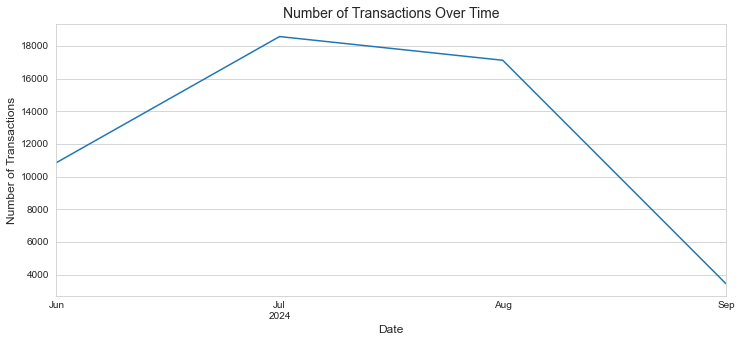

In [32]:
# Transactions Over Time - Found July is a high volume month

# Convert date columns to datetime
Transactions["PURCHASE_DATE"] = pd.to_datetime(Transactions["PURCHASE_DATE"])
Transactions["SCAN_DATE"] = pd.to_datetime(Transactions["SCAN_DATE"])
#Plot
plt.figure(figsize=(12, 5))
Transactions.resample("M", on="PURCHASE_DATE").size().plot(kind="line")
plt.title("Number of Transactions Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.show()

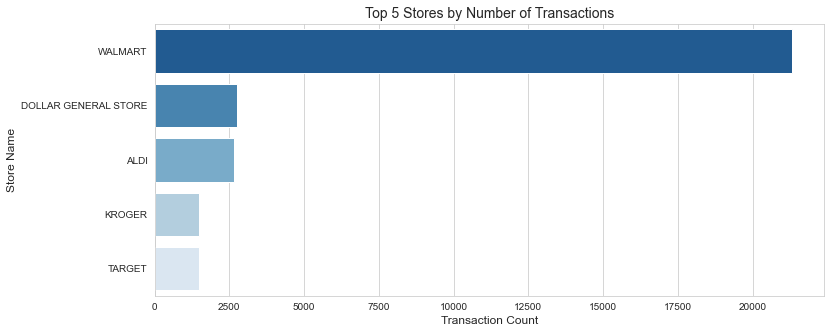

In [33]:
# Top 5 Stores by Transaction Count
top_stores = Transactions["STORE_NAME"].value_counts().head(5)
plt.figure(figsize=(12, 5))
sns.barplot(x=top_stores.values, y=top_stores.index, palette="Blues_r")
plt.title("Top 5 Stores by Number of Transactions", fontsize=14)
plt.xlabel("Transaction Count", fontsize=12)
plt.ylabel("Store Name", fontsize=12)
plt.show()

## Second: provide SQL queries

### 1. Data cleaning for SQL queries:

In [34]:
# Users: filter valid ages (10-100)
Users_cleaned = Users[(Users["AGE"] > 10) & (Users["AGE"] < 100)]
print(Users.shape,Users_cleaned.shape)

(100000, 9) (96243, 9)


In [35]:
# Products: Drop missing in BARCODE 
Products_cleaned = Products.dropna(subset=["BARCODE"])

# Placeholders for manufacturer and brand
Products_cleaned['MANUFACTURER']=np.where(Products_cleaned['MANUFACTURER']=='PLACEHOLDER',np.nan,Products_cleaned['MANUFACTURER'])
Products_cleaned['BRAND']=np.where(Products_cleaned['BRAND']=='BRAND NOT KNOWN',np.nan,Products_cleaned['MANUFACTURER'])

Products_cleaned = Products_cleaned.drop_duplicates()

print(Products_cleaned.shape,Products.shape)

(841367, 7) (845552, 7)


In [36]:
Products_cleaned[(Products_cleaned.duplicated(keep=False)) & (Products_cleaned['BARCODE'].notna())].sort_values(by='BARCODE')

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE


In [37]:
# Transactions: 

# Replace 'zero' in FINAL_QUANTITY with 0 and convert to numeric
Transactions_cleaned = Transactions.copy()
Transactions_cleaned['FINAL_QUANTITY'] = Transactions_cleaned['FINAL_QUANTITY'].replace('zero', '0').astype(float)

# Replace ' ' in FINAL_SALE with 0 and convert to numeric
Transactions_cleaned['FINAL_SALE'] = Transactions_cleaned['FINAL_SALE'].replace(' ', '0').astype(float)

# Deduplicate RECEIPT_ID: Keep the record with the highest FINAL_SALE for each (RECEIPT_ID, BARCODE)
Transactions_cleaned = Transactions_cleaned.sort_values(by=['RECEIPT_ID', 'BARCODE', 'FINAL_SALE','FINAL_QUANTITY'], ascending=[True, True, False, False])
Transactions_cleaned = Transactions_cleaned.drop_duplicates(subset=['RECEIPT_ID', 'BARCODE'], keep='first')

print(Transactions_cleaned.shape,Transactions.shape)

(24795, 8) (50000, 8)


### 2. Some relevant analysis 

In [38]:
# Merge the three datasets
df = Transactions_cleaned.merge(Users_cleaned.rename(columns={'ID':'USER_ID'}),how='left',on='USER_ID',indicator='exist_in_user').merge(Products_cleaned,how='left',on='BARCODE',indicator='exist_in_product')
df.shape

(24797, 24)

In [39]:
# Check combined file and found most users in transactions are not in the Users table - data issue
df['exist_in_user'].value_counts()

left_only     24668
both            129
right_only        0
Name: exist_in_user, dtype: int64

In [40]:
# Check combined file and found most products in transactions are not in the Products table - data issue
df['exist_in_product'].value_counts()

left_only     12440
both          12357
right_only        0
Name: exist_in_product, dtype: int64

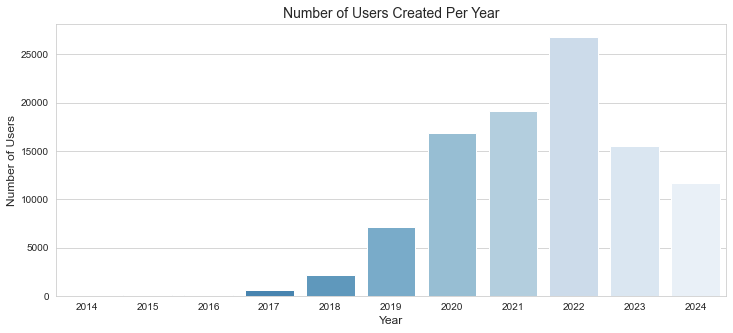

In [41]:
# Understand growth of Fetch by checking number of users created in each month

# Count users per year
Users["CREATED_DATE_YEAR"] = pd.to_datetime(Users["CREATED_DATE"]).dt.year
user_counts = Users["CREATED_DATE_YEAR"].value_counts().sort_index()

# Users Created Per Year - 2022 is a fast growing year
plt.figure(figsize=(12, 5))
sns.barplot(x=user_counts.index, y=user_counts.values, palette="Blues_r")
plt.title("Number of Users Created Per Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.show()

In [42]:
# Understand the user's age and spending power 
Users['Age Band'].value_counts()

25-34     23993
35-44     22135
45-54     16558
18-24     12360
55-64     12291
65-74      5826
75-100     1726
<18        1374
100+         62
Name: Age Band, dtype: int64

In [43]:
age_band_summary = df.groupby(['Age Band'])[['RECEIPT_ID', 'FINAL_SALE']].agg({'RECEIPT_ID': 'count', 'FINAL_SALE': 'mean'}).reset_index()
age_band_summary

,Age Band,RECEIPT_ID,FINAL_SALE
0,<18,0,NaN
1,18-24,0,NaN
2,25-34,10,4.601000
3,35-44,32,4.689375
4,45-54,27,4.438148
5,55-64,29,3.251034
6,65-74,22,7.953636
7,75-100,9,1.906667
8,100+,0,NaN


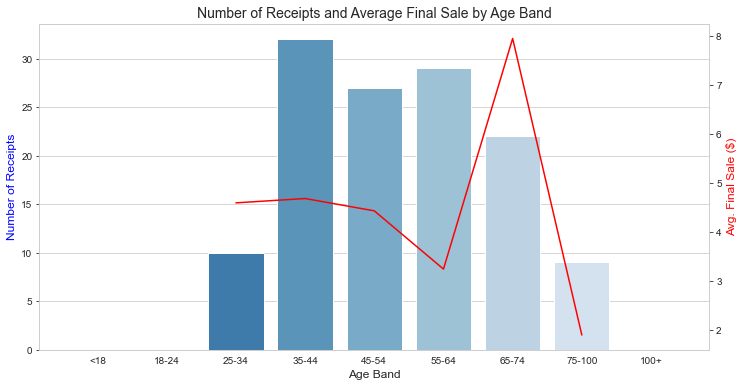

In [44]:
# Visualize distribution of #receipts uploaded in each age group and their spending power
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for the number of receipts
sns.barplot(x="Age Band", y="RECEIPT_ID", data=age_band_summary, palette="Blues_r", ax=ax1)
ax1.set_ylabel("Number of Receipts", fontsize=12, color="blue")
ax1.set_xlabel("Age Band", fontsize=12)
ax1.set_title("Number of Receipts and Average Final Sale by Age Band", fontsize=14)

# Create a secondary Y-axis for average final sale
ax2 = ax1.twinx()
sns.lineplot(x="Age Band", y="FINAL_SALE", data=age_band_summary, color="red", ax=ax2)
ax2.set_ylabel("Avg. Final Sale ($)", fontsize=12, color="red")

plt.grid(False)
plt.show()

### 3. SQL Queries:

In [45]:
# # 1. What are the top 5 brands by receipts scanned among users 21 and over?

# WITH Filtered_Users AS (
#     SELECT ID
#     FROM Users_cleaned
#     WHERE DATEDIFF(YEAR, BIRTH_DATE, GETDATE()) >= 21
# )
# SELECT TOP 5 p.BRAND, COUNT(t.RECEIPT_ID) AS receipts_scanned
# FROM Transactions_cleaned t
# JOIN Filtered_Users u ON t.USER_ID = u.ID
# JOIN Products_cleaned p ON t.BARCODE = p.BARCODE
# GROUP BY p.BRAND
# ORDER BY COUNT(t.RECEIPT_ID) DESC;

In [46]:
# # 2. What are the top 5 brands by sales among users that have had their account for at least six months?

# WITH Eligible_Users AS (
#     SELECT ID
#     FROM Users
#     WHERE DATEDIFF(MONTH, CREATED_DATE, GETDATE()) >= 6
# )
# SELECT TOP 5 p.BRAND, SUM(t.CLEANED_SALE) AS total_sales
# FROM Transactions_cleaned t
# JOIN Eligible_Users u ON t.USER_ID = u.ID
# JOIN Products_cleaned p ON t.BARCODE = p.BARCODE
# GROUP BY p.BRAND
# ORDER BY SUM(t.CLEANED_SALE) DESC;

In [47]:
# # 3. Who are Fetch’s power users?
# # A user’s power is measured by receipt count and total sales contribution.
# # The top 100 users with the highest number of receipts and spending are considered power users.

# SELECT u.ID, COUNT(t.RECEIPT_ID) AS receipt_count, SUM(t.CLEANED_SALE) AS total_spent
# FROM Transactions_cleaned t
# JOIN Users_cleaned u ON t.USER_ID = u.ID
# GROUP BY u.ID
# ORDER BY COUNT(t.RECEIPT_ID) DESC, SUM(t.CLEANED_SALE) DESC
# LIMIT 100;